# Part I: Is Seattle a good place for my AirBnB?

I want to find out if the number of listings in Seattle is growing? Is the availability of listings decreasing due to a growing demand? Is AirBnB in Seattle becoming more popular? Are some neighbourhoods more popular than others? Are people giving more ratings? 

## Step 1: Gather

To answer the questions above I will be using the 'listing.csv', 'calendar.csv' and 'reviews.csv' datasets

In [1]:
!pip install pycodestyle pycodestyle_magic
!pip install flake8
%load_ext pycodestyle_magic

In [2]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import calendar.csv
df_calendar = pd.read_csv('./calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
#Import reviews.csv
df_reviews = pd.read_csv('./reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
#Import listings.csv (only the neighbourhood column)
df_listings = pd.read_csv('./listings.csv')
df_listings.rename(columns={'id': "listing_id"}, inplace=True)
df_listings = df_listings[['listing_id', 'neighbourhood_group_cleansed']]
df_listings.head()

,listing_id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [6]:
# Join the listings table to the calendar table to bring in the neighbourhood information 
df_calendar = pd.merge(df_calendar, df_listings, on='listing_id', how = 'left')
df_calendar.head()

,listing_id,date,available,price,neighbourhood_group_cleansed
0,241032,2016-01-04,t,$85.00,Queen Anne
1,241032,2016-01-05,t,$85.00,Queen Anne
2,241032,2016-01-06,f,NaN,Queen Anne
3,241032,2016-01-07,f,NaN,Queen Anne
4,241032,2016-01-08,f,NaN,Queen Anne


# Step 2: Assess

I'd like to see if the popularity of AirBnb is growing over time in Seattle. Lets see what data I have to work with.

In [7]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 5 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   listing_id                    1393570 non-null  int64 
 1   date                          1393570 non-null  object
 2   available                     1393570 non-null  object
 3   price                         934542 non-null   object
 4   neighbourhood_group_cleansed  1393570 non-null  object
dtypes: int64(1), object(4)
memory usage: 63.8+ MB


I can use this data to see the availability of listings over time and if there is a difference between neighbourhoods. I will need to change the datatypes of the 'date' and 'available' columns. 

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


I can use this dataset to determine if number of ratings is growing over time and therefore the popularity of AirBnbs in Seattle. I will need to change the datatypes of the 'date' column. 

# Step 3: Clean

In [9]:
# Convert 'date' column in calendar to date format
df_calendar["date"] = pd.to_datetime(df_calendar["date"])

In [10]:
# Convert 'date' column in reviews to date format
df_reviews["date"] = pd.to_datetime(df_reviews["date"])

# Add columns to differentiate Month and year
df_reviews["month"] = pd.DatetimeIndex(df_reviews['date']).month
df_reviews["year"] = pd.DatetimeIndex(df_reviews['date']).year

In [11]:
# Add columns to differentiate Month and year
df_calendar["month"] = pd.DatetimeIndex(df_calendar['date']).month
df_calendar["year"] = pd.DatetimeIndex(df_calendar['date']).year

In [12]:
# Clean 'avaiable' column for analysis
df_calendar["available"] = df_calendar["available"].replace({'t': 0, 'f': 1})

In [13]:
df_calendar.head()

,listing_id,date,available,price,neighbourhood_group_cleansed,month,year
0,241032,2016-01-04,0,$85.00,Queen Anne,1,2016
1,241032,2016-01-05,0,$85.00,Queen Anne,1,2016
2,241032,2016-01-06,1,NaN,Queen Anne,1,2016
3,241032,2016-01-07,1,NaN,Queen Anne,1,2016
4,241032,2016-01-08,1,NaN,Queen Anne,1,2016


# Step 4: Analyze

In [14]:
df_calendar["date"].describe()

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_1664/3721990097.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_calendar["date"].describe()


count                 1393570
unique                    365
top       2016-01-04 00:00:00
freq                     3818
first     2016-01-04 00:00:00
last      2017-01-02 00:00:00
Name: date, dtype: object

I only have calendar data for one year - from the 4th Jan 2016 to 2nd Jan 2017. So let's see if the listings are growing over the course of the year. 

<AxesSubplot:xlabel='year,month'>

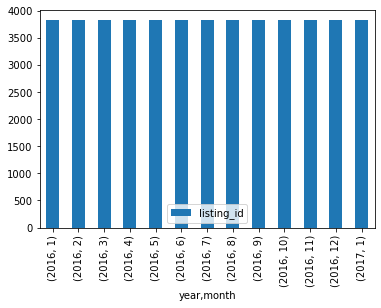

In [15]:
# View number of listings over the year
df_calendar.groupby(["year", "month"]).agg({"listing_id": np.sum, "listing_id": pd.Series.nunique}).plot(kind="bar")

The number of listings has actually remained the same throughout the year. So we need to look at another way of determining the AirBnB trend.

We can look at how the Occupancy Rate changes over the year. If the number of listings booked (listing not available) out of the total listings for a given month is increasing, then we will know if AirBnBs are becoming more popular. 

$Occupancy = \frac{ListingsBooked}{ListingsTotal}$

In [16]:
# Determine occupancy rate 

df_Occupancy = (df_calendar.groupby(["year", "month"]).sum()["available"]/df_calendar.groupby(["year", "month"]).count()["listing_id"]).reset_index()
df_Occupancy.rename(columns={0: "Occupancy%"}, inplace=True)
df_Occupancy['YearMonth'] = df_Occupancy.apply(lambda row: str(row['year'].astype(int)) + "_" + str(row['month'].astype(int)), axis = 1)
df_Occupancy

,year,month,Occupancy%,YearMonth
0,2016,1,0.445867,2016_1
1,2016,2,0.337792,2016_2
2,2016,3,0.290813,2016_3
3,2016,4,0.336153,2016_4
4,2016,5,0.324330,2016_5
5,2016,6,0.325616,2016_6
6,2016,7,0.372903,2016_7
7,2016,8,0.354949,2016_8
8,2016,9,0.325598,2016_9
9,2016,10,0.303486,2016_10


It would also be useful to understand if there is a difference in occupancy rates for each neighbourhood

In [17]:
# Determine occupancy rate per neighbourhood

list_neighbourhoods=df_calendar['neighbourhood_group_cleansed'].unique()

df_Occupancy_area=(df_calendar.groupby(["year", "month", "neighbourhood_group_cleansed"]).sum()["available"]
                    / df_calendar.groupby(["year", "month", "neighbourhood_group_cleansed"]).count()["listing_id"]).reset_index()
df_Occupancy_area.rename(columns={0: 'Occupancy%'}, inplace=True)
df_Occupancy_area['YearMonth']=df_Occupancy_area.apply(lambda row: str(row['year']) + "_" + str(row['month']), axis=1)
df_Occupancy_area

,year,month,neighbourhood_group_cleansed,Occupancy%,YearMonth
0,2016,1,Ballard,0.484161,2016_1
1,2016,1,Beacon Hill,0.413438,2016_1
2,2016,1,Capitol Hill,0.470522,2016_1
3,2016,1,Cascade,0.561798,2016_1
4,2016,1,Central Area,0.484127,2016_1
...,...,...,...,...,...
216,2017,1,Queen Anne,0.244068,2017_1
217,2017,1,Rainier Valley,0.248428,2017_1
218,2017,1,Seward Park,0.295455,2017_1
219,2017,1,University District,0.229508,2017_1


Another way we can see how the popularity of AirBnbs in Seattle is changing is by looking at the **number of reviews coming in**.

In [18]:
# Determine if number of reviews is increasing over time
df_reviewCount = df_reviews.groupby(['year','month']).count()['id'].reset_index()
df_reviewCount.rename(columns = {'id': 'Count'}, inplace=True)
df_reviewCount['YearMonth'] = df_reviewCount.apply(lambda row: str(row['year']) + "_" + str(row['month']), axis = 1)
df_reviewCount

,year,month,Count,YearMonth
0,2009,6,2,2009_6
1,2009,7,1,2009_7
2,2009,8,1,2009_8
3,2009,9,2,2009_9
4,2009,10,6,2009_10
...,...,...,...,...
74,2015,9,6985,2015_9
75,2015,10,5536,2015_10
76,2015,11,3998,2015_11
77,2015,12,3351,2015_12


# Step 5: Visualize

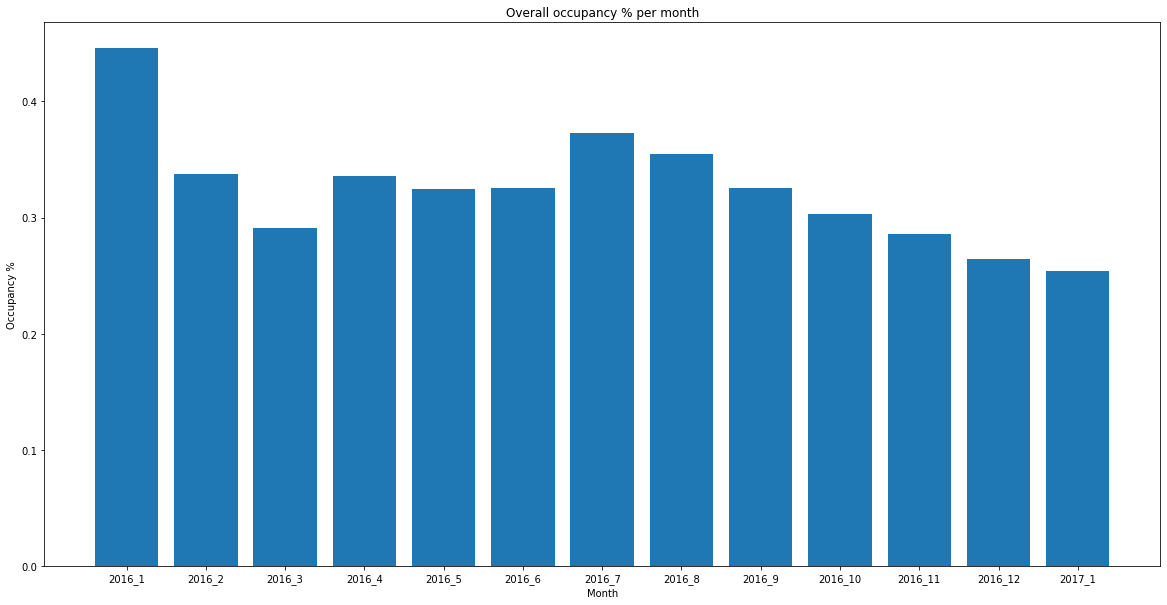

In [19]:
# Plot Occupancy over the year

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

x = df_Occupancy['YearMonth']
y = df_Occupancy['Occupancy%']

plt.bar(x,y)
plt.xlabel('Month')
plt.ylabel('Occupancy %')
plt.title('Overall occupancy % per month')
plt.show()

The plot is showing clearly showing some seasonality over the year, with occupancy rate increasing in the June/ July summer. But we are also seeing an overall decreasing trend in occupancy from 2016 - 2017. Fewer people are visiting the AirBnbs towards the end of 2016. Is this trend consistent across the differernt Seattle neighbourhoods? 

Text(0.5, 1.0, 'Occupancy % per neighbourhood over the year')

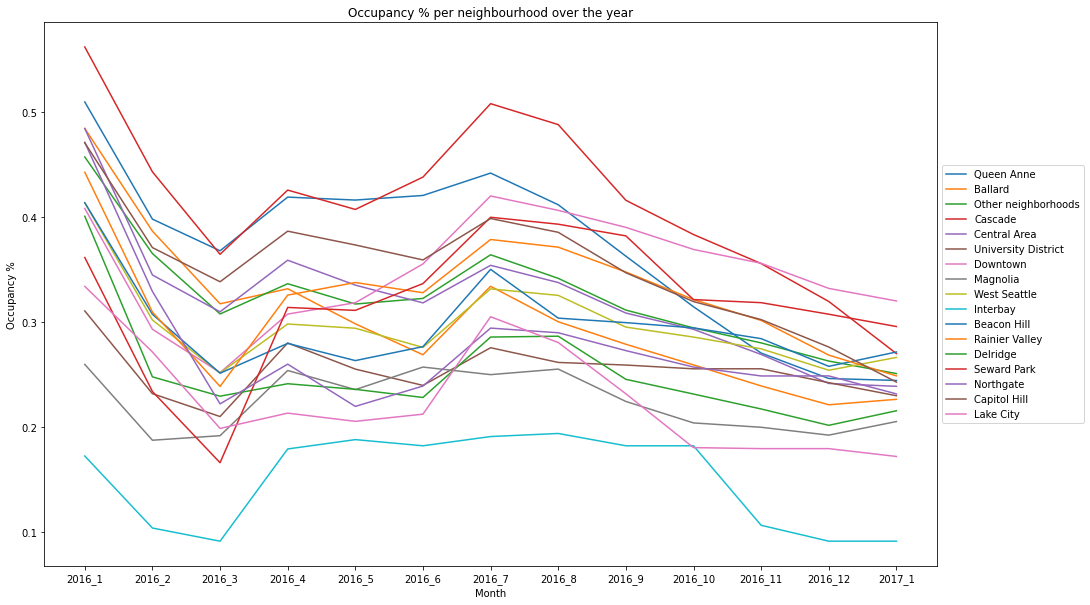

In [20]:
# Plot Occupancy per neighbourhood over the year

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in list_neighbourhoods:
    x = df_Occupancy_area[df_Occupancy_area['neighbourhood_group_cleansed'] == neighbourhood]['YearMonth']
    y = df_Occupancy_area[df_Occupancy_area['neighbourhood_group_cleansed'] == neighbourhood]['Occupancy%']
    ax.plot(x, y, label = neighbourhood)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Occupancy %')
plt.xlabel('Month')
plt.title('Occupancy % per neighbourhood over the year')

We are seeing the same overall decreasing trend across each of the neighbourhoods in Seattle. AirBnbs are getting less booked up as the year progresses. 

/var/folders/67/jgz6df654fv9n3yp6bkjl9f8ry5zws/T/ipykernel_1664/26081083.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


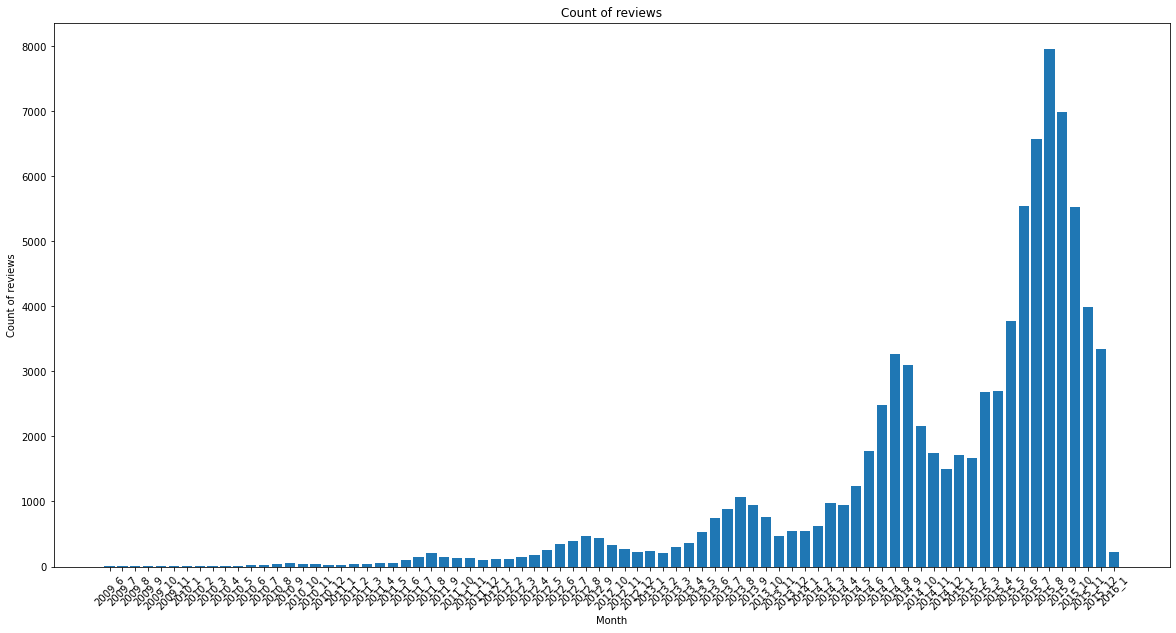

In [21]:
# Plot number of reviews over time

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

x = df_reviewCount['YearMonth']
y = df_reviewCount['Count']

plt.bar(x,y)
plt.xlabel('Month')
ax.set_xticklabels(x, rotation=45)
plt.ylabel('Count of reviews')
plt.title('Count of reviews')
plt.show()

Unfortunately this review data's timeframe is different to the calendar. But we are still seeing an interesting trend towards the end of 2015. We don't have the full dataset for December 2015 and January 2016, but we can clealy see the number of reviews dropping over 2015. If we assume this trend continues in 2016, it could mean that fewer people are visiting these AirBnbs as they are not being reviewed as often. 

In conclusion, Seattle may not be the best place to list your place on AirBnb in 2017